In [ ]:
# the script is used for reproduce figure 2c in Lakshmikanth et al 2024

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
from matplotlib import rcParams
import scanpy as sc
import os
import anndata
from sklearn.mixture import GaussianMixture
from fcsy import DataFrame
import matplotlib
from glob import glob
matplotlib.rcParams['pdf.fonttype']=42
matplotlib.rcParams['ps.fonttype']=42
import warnings
warnings.filterwarnings("ignore")
from igraph import InternalError

# scanpy settings
sc.settings.verbosity = 0  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=150, frameon=False, figsize=(4, 4)) 
sc._settings.ScanpyConfig.n_jobs=4 # useless

In [2]:
adata = anndata.read_h5ad('./Figure2/pDC_sample5000.h5ad')

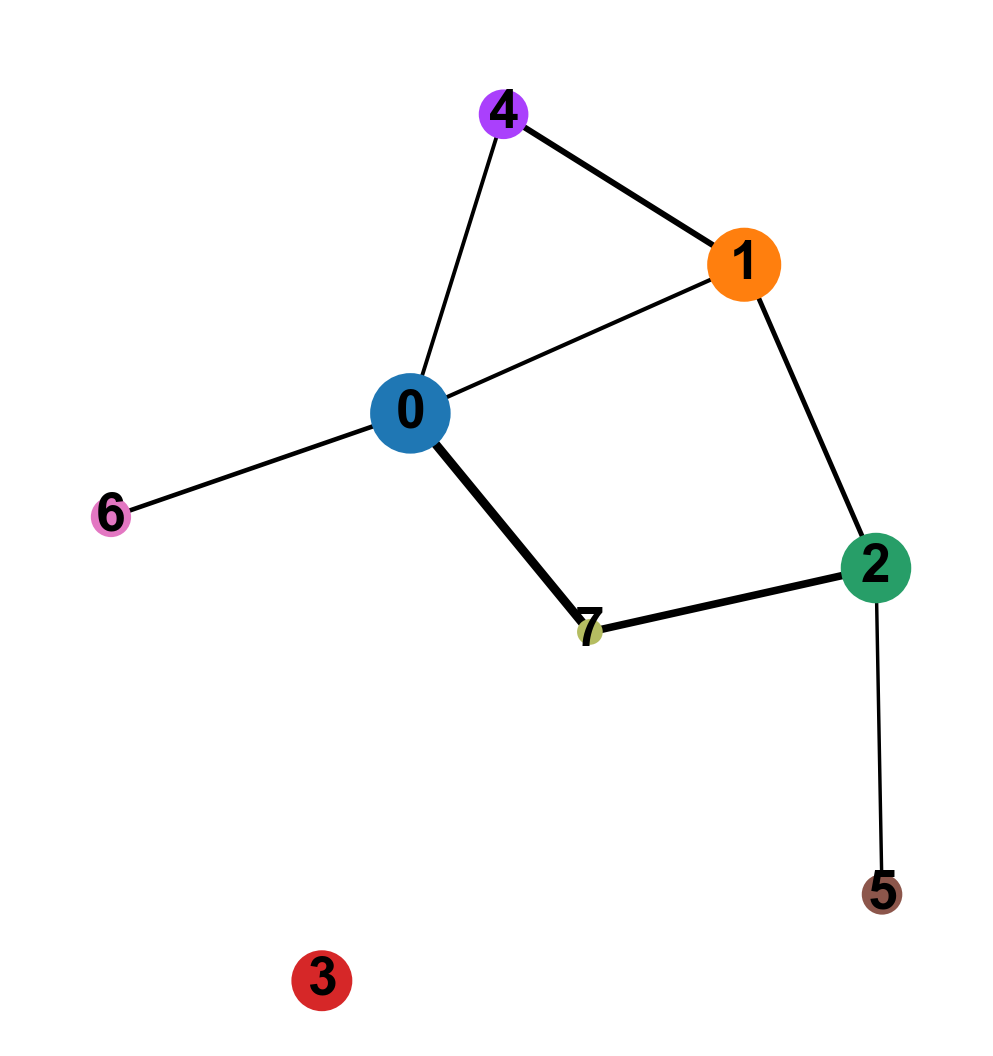

In [3]:
sc.pp.neighbors(adata, n_neighbors=10, use_rep='X')
sc.tl.leiden(adata, resolution=0.3) 
sc.tl.paga(adata, groups='leiden')
sc.pl.paga(adata, color=['leiden'], threshold=0.1)

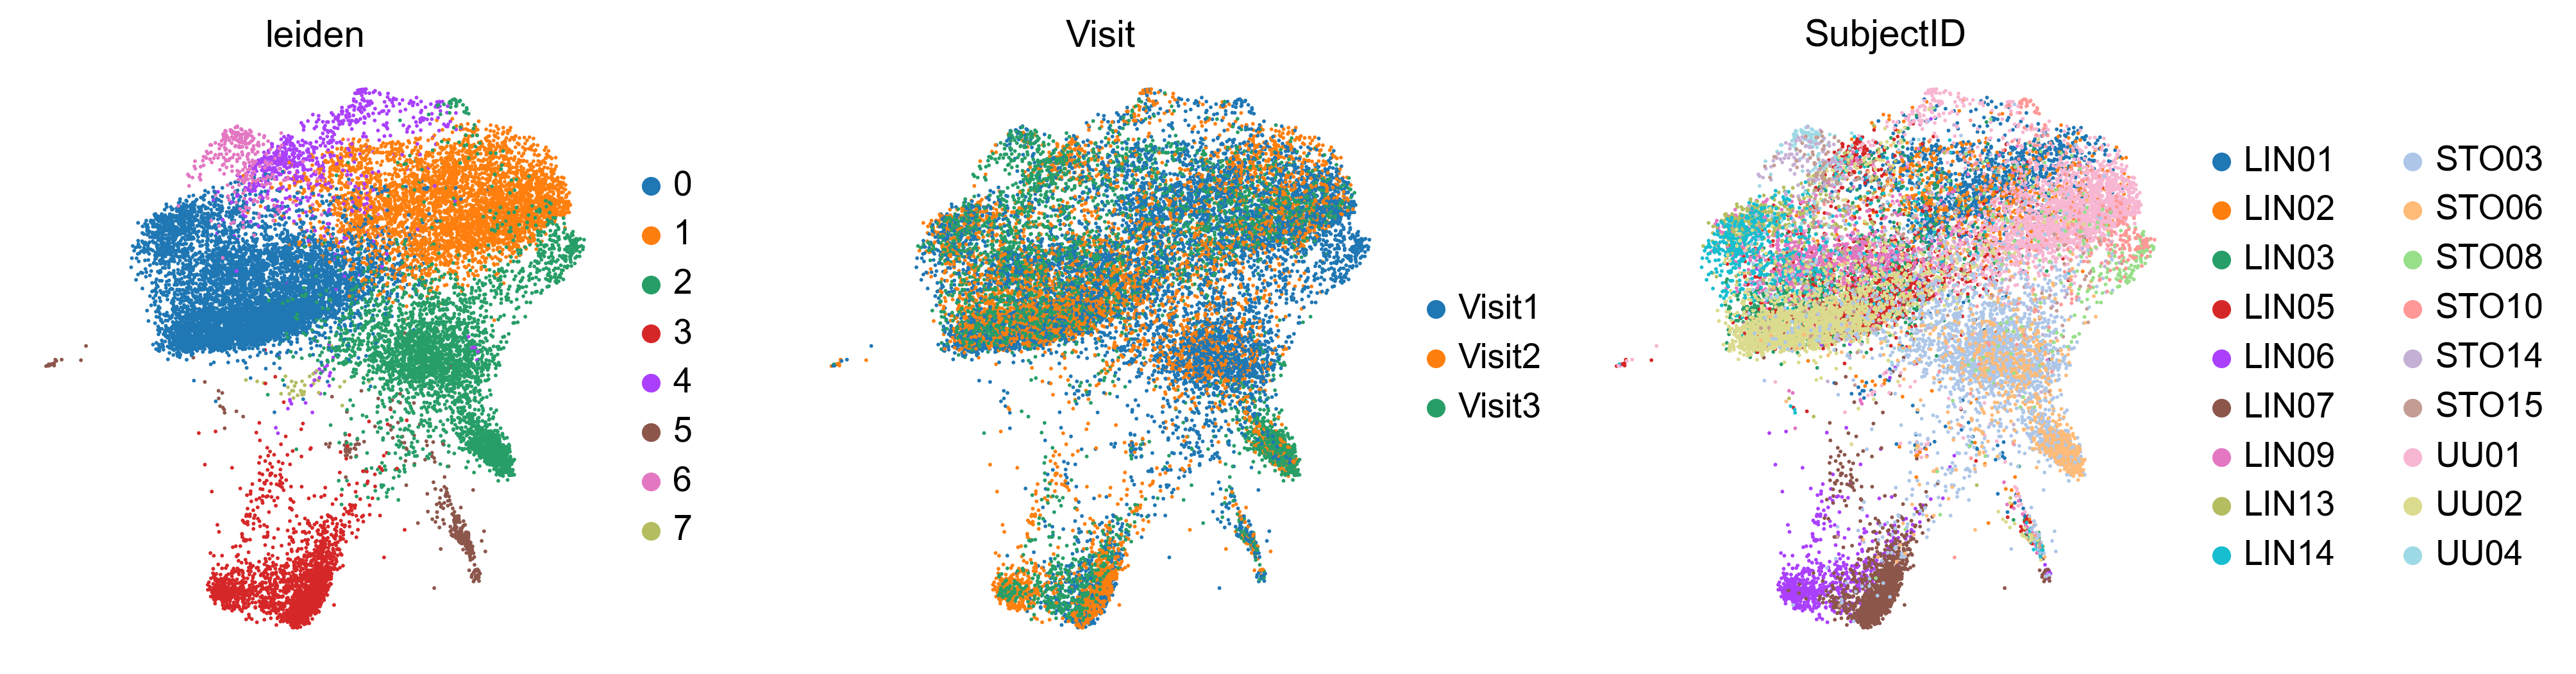

In [4]:
sc.tl.draw_graph(adata, init_pos='paga')
sc.pl.draw_graph(adata, color=['leiden', 'Visit', 'SubjectID'])

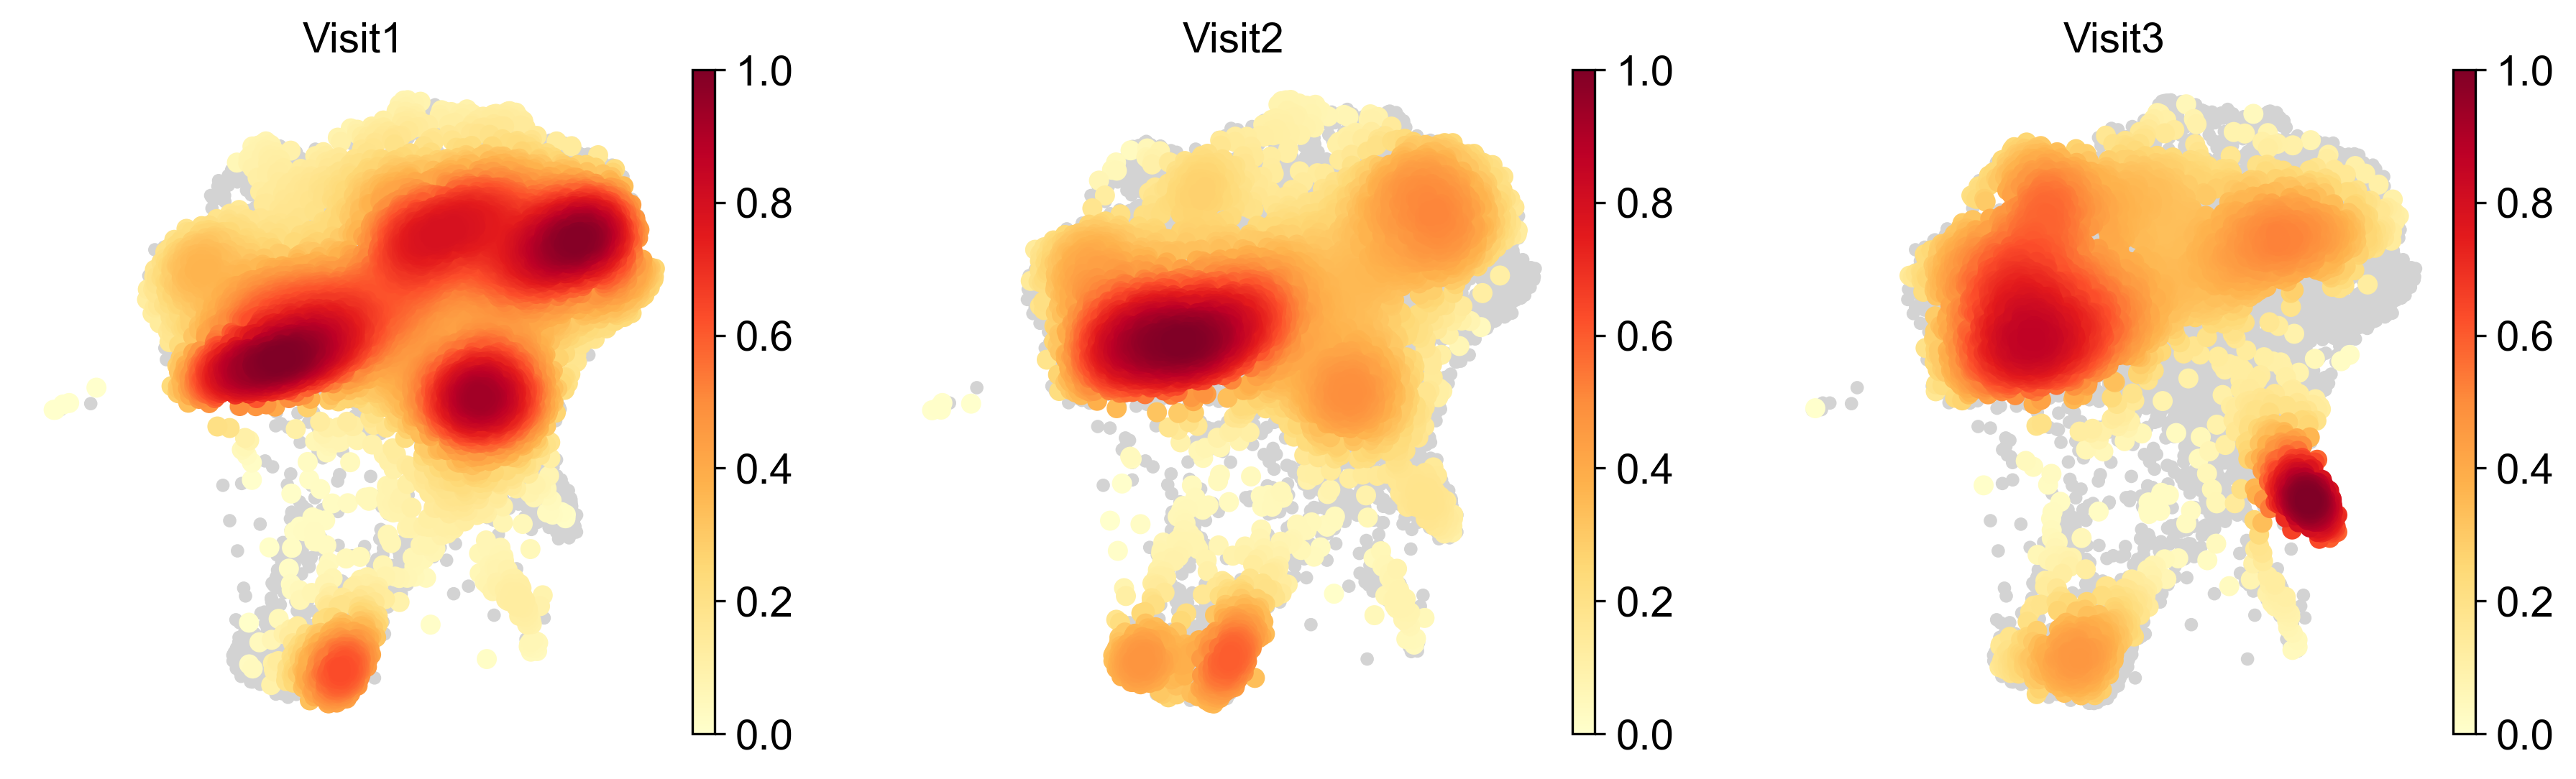

In [5]:
sc.tl.embedding_density(adata, basis='draw_graph_fa', groupby='Visit')
sc.pl.embedding_density(adata, basis='draw_graph_fa', key='draw_graph_fa_density_Visit', group=['Visit1', 'Visit2', 'Visit3'])

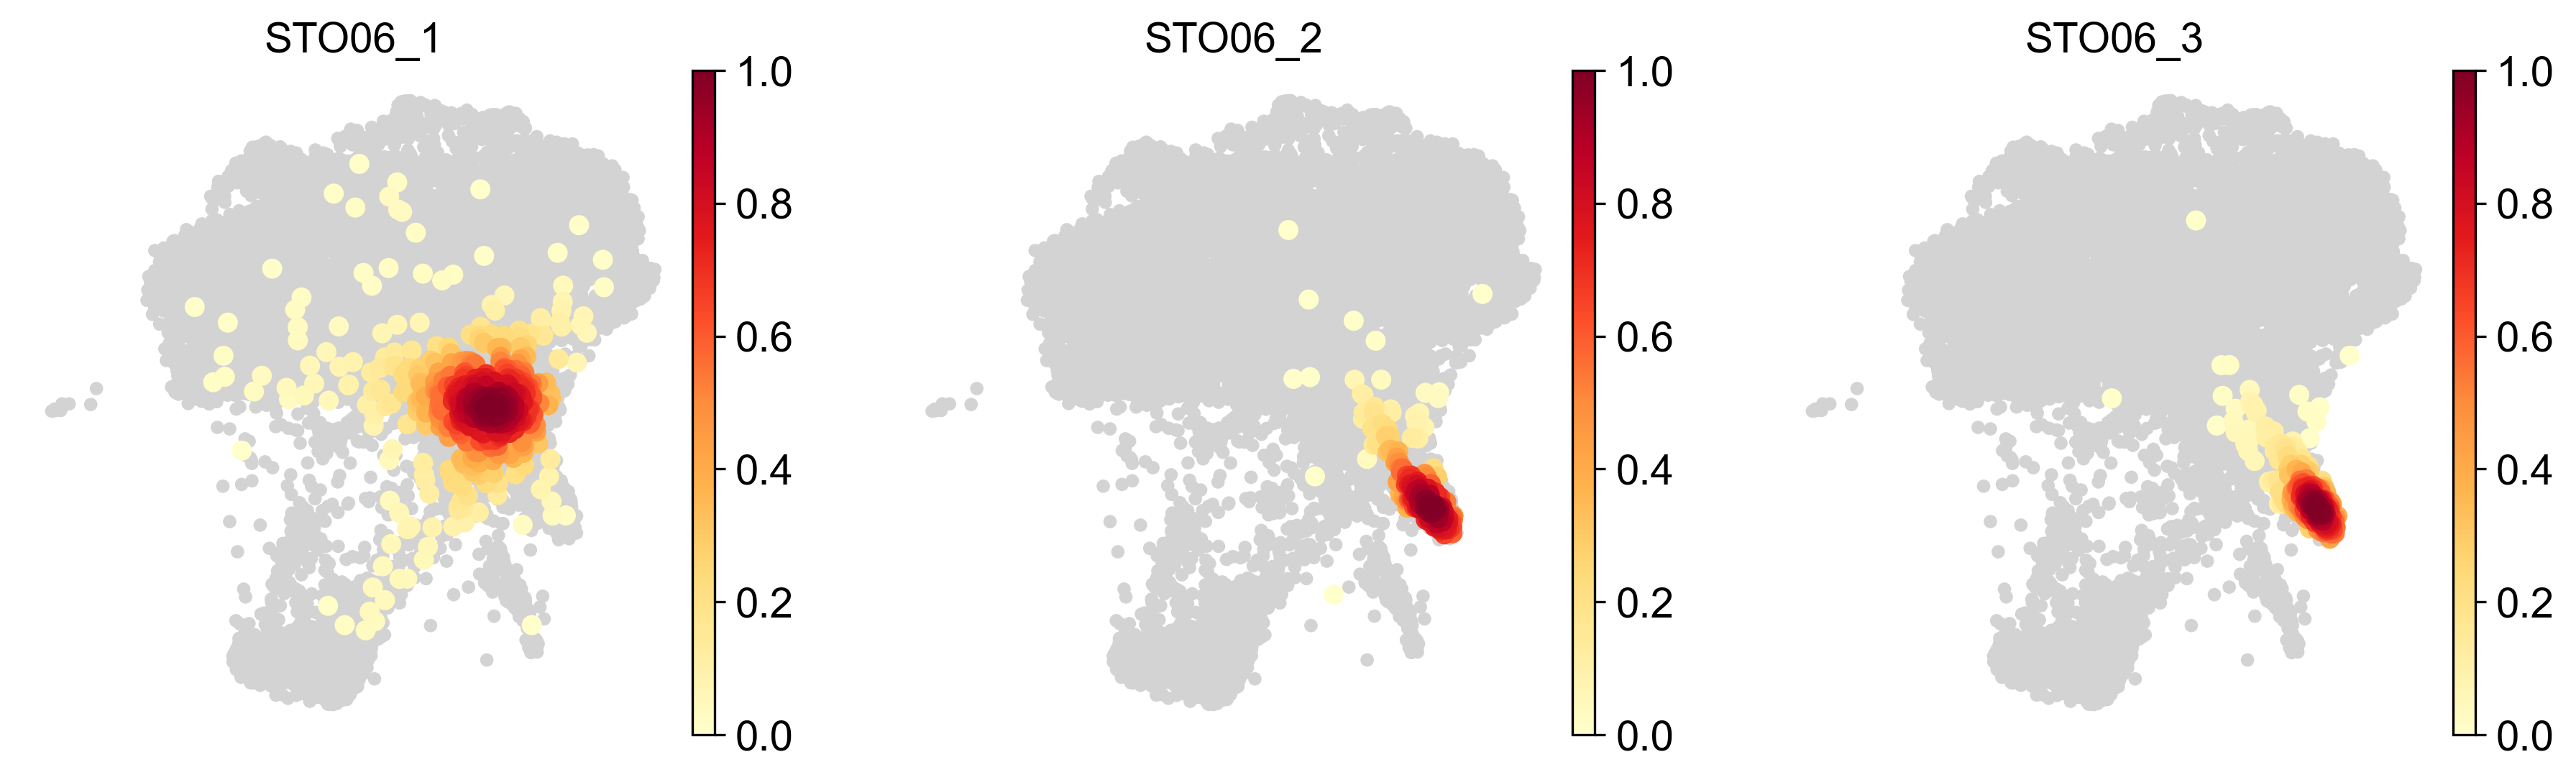

In [7]:
# Figure 2e shows one representative with the most clear trend, but the same trend is shared by many other subjects.
sc.tl.embedding_density(adata, basis='draw_graph_fa', groupby='Subject')
sc.pl.embedding_density(adata, basis='draw_graph_fa', key='draw_graph_fa_density_Subject', group=['STO06_1', 'STO06_2', 'STO06_3'])